<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Data & Analysing it

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
data.data.shape

(569, 30)

In [0]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(data.data, data.target, test_size = 0.33)

In [0]:
N,D = X_train.shape  # Just assigning the shape to N & D just in case may use later

In [0]:
D

30

# Scaling the Data




In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # We don't fit it as we don't want the test data to be exposed to the scaler

# Creating the Model

In [0]:
import tensorflow as tf


In [0]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Input(shape=(D,)),
                                   tf.keras.layers.Dense(1, activation='sigmoid')]) # The one takes in the input (D) to get an output of size (1) 
                                                                                    # sigmoid as we only want the outputs to range from 0 to 1


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, verbose=0)

print("Train score:", model.evaluate(X_train,y_train))
print("Test score:", model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9738
Train score: [0.12087151408195496, 0.9737532734870911]
6/6 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9734
Test score: [0.11836884170770645, 0.9734042286872864]


# Plotting the Loss

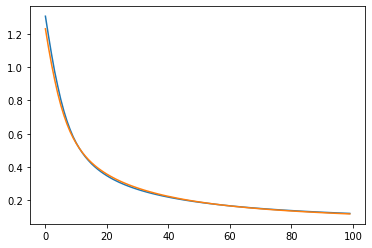

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'vaL_loss')


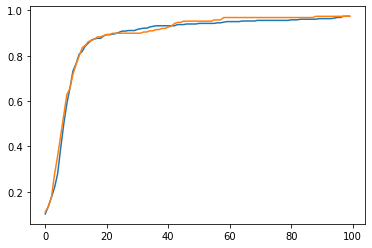

In [0]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'vaL_accuracy')

# Making Predictions